# Imports

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare data

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [ ]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [ ]:
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model

In [ ]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# Loss and optimizer

In [ ]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train loop

In [ ]:
num_epochs = 100

for epoch in range(num_epochs):
  # Forward pass
  y_pred = model(X)

  # Calculate loss
  loss = criterion(y_pred, y)

  # Gradients = backwards pass
  loss.backward()

  # Update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 10, loss=4303.6895
epoch: 20, loss=3210.5649
epoch: 30, loss=2420.3179
epoch: 40, loss=1848.3822
epoch: 50, loss=1434.0144
epoch: 60, loss=1133.5138
epoch: 70, loss=915.3940
epoch: 80, loss=756.9401
epoch: 90, loss=641.7422
epoch: 100, loss=557.9338


# Plot

In [ ]:
predicted = model(X).detach().numpy()

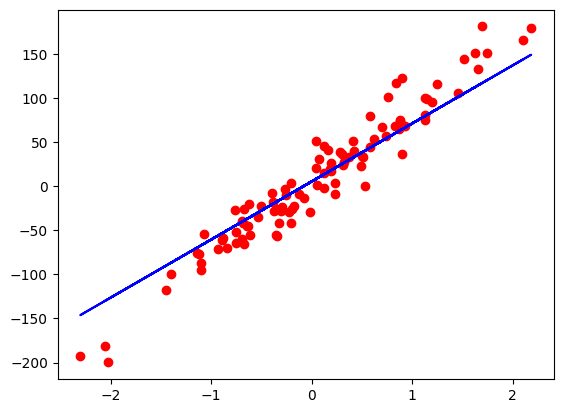

In [ ]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()